[sample data length is 60000 | number of classes is 10]
((0, 5923), (1, 6742), (2, 5958), (3, 6131), (4, 5842), (5, 5421), (6, 5918), (7, 6265), (8, 5851), (9, 5949))


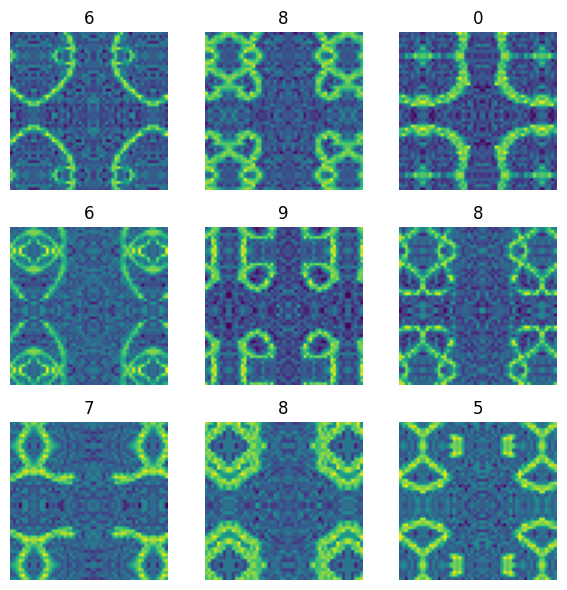

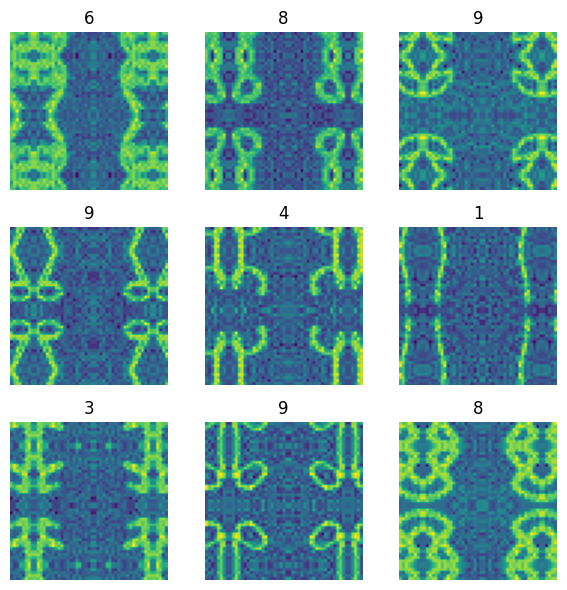

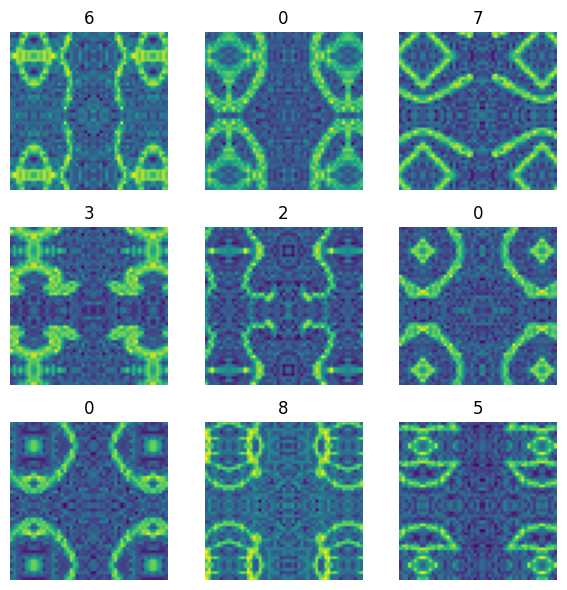

In [1]:
from dataloader.dataloader import DataLoader
from datasets.mnist_dataset import Dataset
from ops.transformations import transform_registry
from utils.config import Config

# num batches to draw
N = 3

def parse_transform(p_transforms):
    transforms = []
    for transform in p_transforms:
        for name, kwargs in transform.items():
            transforms.append(transform_registry.get(name, vars(kwargs)))
    return transforms


# train
train_cfg = Config.from_file('../configs/task1/task1_train.json')
train_params = vars(train_cfg.data)
train_params['transforms'] = parse_transform(train_params['transforms'])

ds = Dataset(**train_params)

dl = DataLoader(ds, 10, 'train', True, 9, 'default')
ds.read_data()

for _ in range(N):
    next(dl.batch_generator())
    dl.show_batch(figsize=(6, 6))

[<utils.config.HelperObject object at 0x10532c700>, <utils.config.HelperObject object at 0x10532d9c0>, <utils.config.HelperObject object at 0x127de0670>]
[sample data length is 10000 | number of classes is 10]
((0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009))


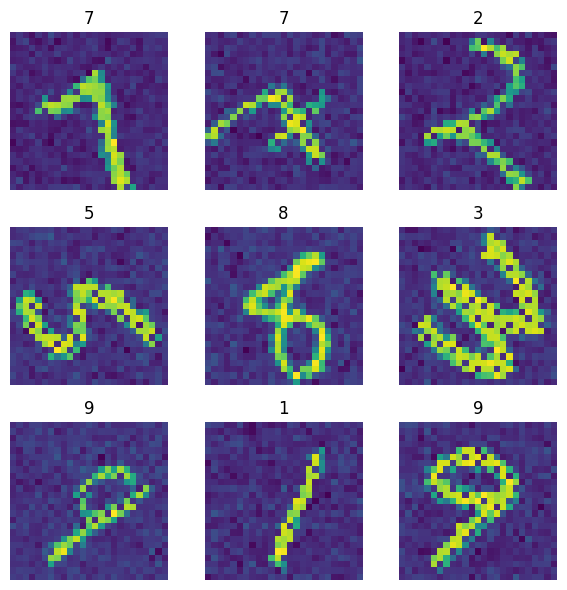

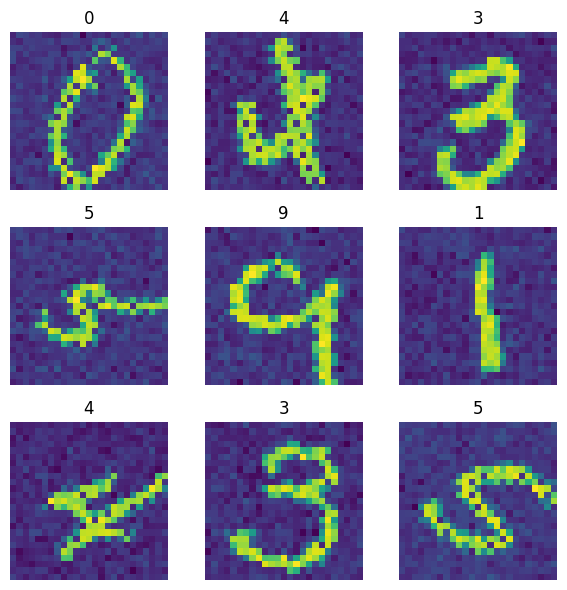

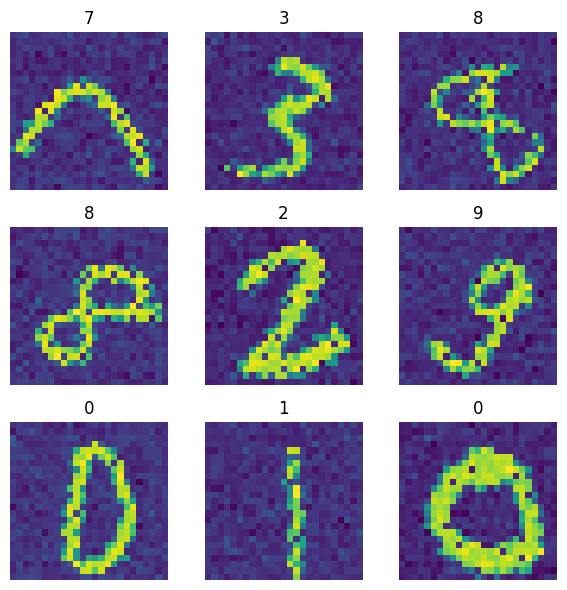

In [2]:
# test
test_cfg = Config.from_file('../configs/task1/task1_test.json')
test_params = vars(test_cfg.data)
print(test_params['transforms'])
test_params['transforms'] = parse_transform(test_params['transforms'])

ds = Dataset(**test_params)

dl = DataLoader(ds, 10, 'test', True, 9, 'default')
ds.read_data()

for _ in range(N):
    next(dl.batch_generator())
    dl.show_batch(figsize=(6, 6))